In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean

In [120]:
import os

os.getcwd()

'C:\\Users\\Lance\\Documents\\Homework\\CS470\\HW1'

In [121]:
df_orig = pd.read_csv("data/data.csv")
df_orig.head()

,person ID,age,gender,chest pain type,resting blood pressure,serum cholesterol in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak = ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment,number of major vessels (0-3) colored by flourosopy,thal: 3 = normal; 6 = fixed defect; 7 = reversable defect,Has heart disease?
0,1,70,M,Type 4,130,322,No,hypertrophy of heart,109,No,2.4,2,3,3,Yes
1,2,67,F,Type 3,115,564,No,hypertrophy of heart,160,No,1.6,2,0,7,No
2,3,57,M,Type 2,124,261,No,myocardial infarction,141,No,0.3,1,0,7,Yes
3,4,64,M,Type 4,128,263,No,myocardial infarction,105,Yes,0.2,2,1,7,No
4,5,74,F,Type 2,120,269,No,hypertrophy of heart,121,Yes,0.2,1,1,3,No


In [122]:
print(df_orig.columns)
print()
print(df_orig.shape)

Index(['person ID', 'age', 'gender', 'chest pain type',
       'resting blood pressure', 'serum cholesterol in mg/dl',
       'fasting blood sugar > 120 mg/dl',
       'resting electrocardiographic results', 'maximum heart rate achieved',
       'exercise induced angina',
       'oldpeak = ST depression induced by exercise relative to rest',
       'the slope of the peak exercise ST segment',
       'number of major vessels (0-3) colored by flourosopy',
       'thal: 3 = normal; 6 = fixed defect; 7 = reversable defect',
       'Has heart disease?'],
      dtype='object')

(100, 15)


## Computing proximity metrics

In [141]:
df = df_orig.select_dtypes(include=["number"])
df = df.drop(columns=['person ID'])

print(df.columns)
X = df.values

n, d = df.shape
print(f"Shape of df:\t({n},{d})")

Index(['age', 'resting blood pressure', 'serum cholesterol in mg/dl',
       'maximum heart rate achieved',
       'oldpeak = ST depression induced by exercise relative to rest',
       'the slope of the peak exercise ST segment',
       'number of major vessels (0-3) colored by flourosopy',
       'thal: 3 = normal; 6 = fixed defect; 7 = reversable defect'],
      dtype='object')
Shape of df:	(100,8)


### Computations

We will compute the pair-wise correlation between all possible pairs and store them in a matrix. We can compute just one triangular section of the matrix since these metrics are commutative.

In [142]:
corrmat = np.zeros((n, n))
cosmat = np.zeros((n,n))
distmat = np.zeros((n,n))

In [143]:
def compute_corr(x, y, n, d):    
    xbar = np.mean(x)
    ybar = np.mean(y)

    cov = 0
    std_x = 0
    std_y = 0
    
    for k in range(d):
        cov += (x[k] - xbar) * (y[k] - ybar)
        std_x += (x[k] - xbar) ** 2
        std_y += (y[k] - ybar) ** 2
        
    cov /= n-1
    std_x = np.sqrt(std_x / (n-1))
    std_y = np.sqrt(std_y / (n-1))

    corr = cov / (std_x * std_y)

    return corr

In [144]:
def compute_cos_sim(x, y, d):
    top = 0

    for i in range(d):
        top += x[i] * y[i]

    bx, by = 0, 0
    
    for i in range(d):
        bx += x[i] ** 2
        by += y[i] ** 2
    bottom = np.sqrt(bx) * np.sqrt(by)

    return top/bottom

In [145]:
for i in range(n):
    corrmat[i, i] = 1
    cosmat[i, i] = 1
    for j in range(i+1, n):
        # Correlation
        x, y = X[i], X[j]
        corr = compute_corr(x, y, n, d)
        corrmat[i, j] = corr
        corrmat[j, i] = corr

        # Cosine
        cos = compute_cos_sim(x, y, d)
        cosmat[i, j] = cos
        cosmat[j, i] = cos

        # Euclidean Distance
        dist = 0
        for k in range(d):
            dist += (x[k] - y[k]) ** 2
        dist = np.sqrt(dist)
        distmat[i, j] = dist
        distmat[j, i] = dist
        
# c2 = np.zeros((n, n))
# for i in range(n):
#     for j in range(i+1, n):
#         c2[i][j] = pearsonr(X[i], X[j], )[0]
#         c2[j][i] = c2[i][j]
# print(c2)

# corr_matrix = np.corrcoef(X, rowvar=True)
# print(corr_matrix)

In [146]:
print(corrmat)
np.savetxt("data/correlation_matrix.csv", corrmat, delimiter=",")
print(corr_check)

[[1.         0.97810141 0.98042395 ... 0.95320676 0.99540319 0.95343518]
 [0.97810141 1.         0.94544521 ... 0.92484717 0.96604433 0.9164208 ]
 [0.98042395 0.94544521 1.         ... 0.99125001 0.99433737 0.99373324]
 ...
 [0.95320676 0.92484717 0.99125001 ... 1.         0.97411584 0.99697203]
 [0.99540319 0.96604433 0.99433737 ... 0.97411584 1.         0.97666334]
 [0.95343518 0.9164208  0.99373324 ... 0.99697203 0.97666334 1.        ]]
[[1.         0.97831831 0.98160717 ... 0.88937292 0.94992342 0.89318022]
 [0.97831831 1.         0.94695949 ... 0.87570185 0.9330628  0.87063766]
 [0.98160717 0.94695949 1.         ... 0.92201783 0.94554064 0.92814045]
 ...
 [0.88937292 0.87570185 0.92201783 ... 1.         0.97246885 0.99695477]
 [0.94992342 0.9330628  0.94554064 ... 0.97246885 1.         0.97554645]
 [0.89318022 0.87063766 0.92814045 ... 0.99695477 0.97554645 1.        ]]


In [147]:
print(cosmat)
np.savetxt("data/cosine_matrix.csv", cosmat, delimiter=",")

[[1.         0.98144697 0.98744495 ... 0.97073314 0.99704999 0.97102415]
 [0.98144697 1.         0.95685246 ... 0.9426465  0.97226743 0.93795913]
 [0.98744495 0.95685246 1.         ... 0.99482902 0.99636286 0.99630395]
 ...
 [0.97073314 0.9426465  0.99482902 ... 1.         0.98407994 0.9981935 ]
 [0.99704999 0.97226743 0.99636286 ... 0.98407994 1.         0.98572919]
 [0.97102415 0.93795913 0.99630395 ... 0.9981935  0.98572919 1.        ]]


In [148]:
print(distmat)
np.savetxt("data/dist_matrix.csv", distmat, delimiter=",")

[[  0.         247.83994835  70.57201995 ... 104.99185683  28.70261312
   96.97778096]
 [247.83994835   0.         303.89749917 ... 330.49394851 253.70644454
  320.52340008]
 [ 70.57201995 303.89749917   0.         ...  39.14128255  55.4347364
   28.48929624]
 ...
 [104.99185683 330.49394851  39.14128255 ...   0.          91.68974861
   24.85960579]
 [ 28.70261312 253.70644454  55.4347364  ...  91.68974861   0.
   78.83406624]
 [ 96.97778096 320.52340008  28.48929624 ...  24.85960579  78.83406624
    0.        ]]


In [149]:
corr_check = np.eye(n)
cos_check = np.eye(n)
dist_check = np.zeros((n, n))

for i in range(n):
    for j in range(i + 1, n):
        x, y = X[i], X[j]
        
        # Pearson correlation
        corr, _ = pearsonr(x, y)
        corr_check[i, j] = corr_check[j, i] = corr

        # Cosine similarity
        cos = cosine_similarity([x], [y])[0, 0]
        cos_check[i, j] = cos_check[j, i] = cos

        # Euclidean distance
        dist = euclidean(x, y)
        dist_check[i, j] = dist_check[j, i] = dist

# Check if your matrices match the library results
assert np.allclose(corrmat, corr_check, atol=1e-6), "Correlation matrix mismatch!"
assert np.allclose(cosmat, cos_check, atol=1e-6), "Cosine similarity matrix mismatch!"
assert np.allclose(distmat, dist_check, atol=1e-6), "Euclidean distance matrix mismatch!"

## Summary Statistics

In [156]:
print(df_orig.columns)
print(df_numeric.columns)

curated_features = [
    'age',
    'resting blood pressure',
    'serum cholesterol in mg/dl', 'maximum heart rate achieved',
    'oldpeak = ST depression induced by exercise relative to rest',
    'number of major vessels (0-3) colored by flourosopy',
]

df_stats = df_orig[curated_features]
print(df_stats.columns)
print(df_stats.shape)

Index(['person ID', 'age', 'gender', 'chest pain type',
       'resting blood pressure', 'serum cholesterol in mg/dl',
       'fasting blood sugar > 120 mg/dl',
       'resting electrocardiographic results', 'maximum heart rate achieved',
       'exercise induced angina',
       'oldpeak = ST depression induced by exercise relative to rest',
       'the slope of the peak exercise ST segment',
       'number of major vessels (0-3) colored by flourosopy',
       'thal: 3 = normal; 6 = fixed defect; 7 = reversable defect',
       'Has heart disease?'],
      dtype='object')
Index(['person ID', 'age', 'resting blood pressure',
       'serum cholesterol in mg/dl', 'maximum heart rate achieved',
       'oldpeak = ST depression induced by exercise relative to rest',
       'the slope of the peak exercise ST segment',
       'number of major vessels (0-3) colored by flourosopy',
       'thal: 3 = normal; 6 = fixed defect; 7 = reversable defect'],
      dtype='object')
Index(['age', 'resting bl

In [172]:
mean = df_stats.mean()
std_dev = df_stats.std()
five_number_summary = df_stats.describe().loc[['min', '25%', '50%', '75%', 'max']]

print("Mean:\n", mean)
print("\nStandard Deviation:\n", std_dev)
print("\nFive-Number Summary:\n", five_number_summary)

# Compute statistics
summary = df_stats.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
summary.index = ['Mean', 'Std Dev', 'Min', 'Q1', 'Median', 'Q3', 'Max']

summary_df = pd.DataFrame(summary)
summary_df.head(10)

Mean:
 age                                                              54.840
resting blood pressure                                          130.270
serum cholesterol in mg/dl                                      247.010
maximum heart rate achieved                                     147.570
oldpeak = ST depression induced by exercise relative to rest      0.902
number of major vessels (0-3) colored by flourosopy               0.630
dtype: float64

Standard Deviation:
 age                                                              9.248227
resting blood pressure                                          16.509474
serum cholesterol in mg/dl                                      58.991952
maximum heart rate achieved                                     22.874385
oldpeak = ST depression induced by exercise relative to rest     1.079280
number of major vessels (0-3) colored by flourosopy              0.895048
dtype: float64

Five-Number Summary:
       age  resting blood pressure  serum c

,age,resting blood pressure,serum cholesterol in mg/dl,maximum heart rate achieved,oldpeak = ST depression induced by exercise relative to rest,number of major vessels (0-3) colored by flourosopy
Mean,54.840000,130.270000,247.010000,147.570000,0.90200,0.630000
Std Dev,9.248227,16.509474,58.991952,22.874385,1.07928,0.895048
Min,35.000000,94.000000,126.000000,96.000000,0.00000,0.000000
Q1,47.000000,120.000000,209.000000,129.750000,0.00000,0.000000
Median,57.000000,130.000000,234.500000,149.500000,0.45000,0.000000
Q3,61.000000,140.000000,270.750000,165.750000,1.52500,1.000000
Max,76.000000,178.000000,564.000000,186.000000,4.20000,3.000000


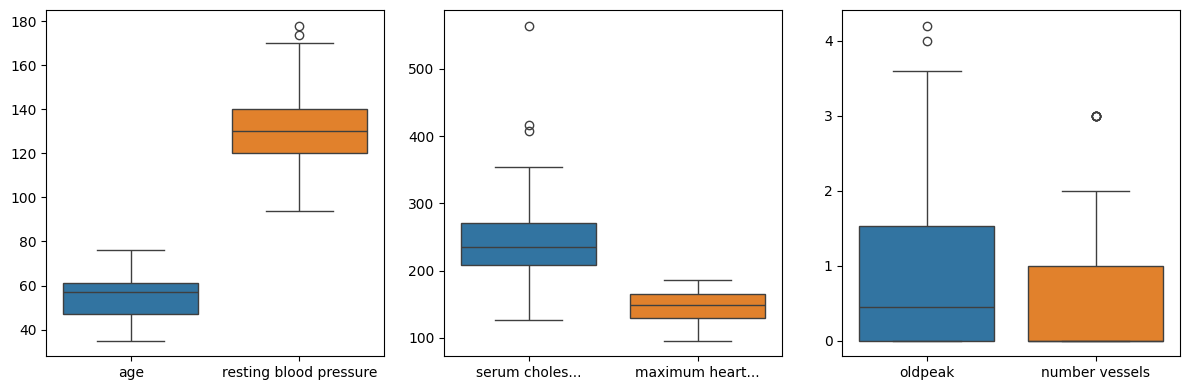

In [168]:
# Assuming df is your (100, 6) DataFrame
plt.figure(figsize=(12, 4))


# First boxplot (first two columns)
plt.subplot(1, 3, 1)
sns.boxplot(data=df_stats.iloc[:, :2])
plt.xticks(ticks=range(2), labels=['age', 'resting blood pressure'])
plt.savefig("boxplot_1.png", dpi=300, bbox_inches='tight')
# plt.close()

# Second boxplot (middle two columns)
plt.subplot(1, 3, 2)
sns.boxplot(data=df_stats.iloc[:, 2:4])
plt.xticks(ticks=range(2), labels=['serum choles...', 'maximum heart...'])
plt.savefig("boxplot_2.png", dpi=300, bbox_inches='tight')
# plt.close()

# Third boxplot (last two columns)
plt.subplot(1, 3, 3)
sns.boxplot(data=df_stats.iloc[:, 4:6])
plt.xticks(ticks=range(2), labels=['oldpeak','number vessels'])
plt.savefig("boxplot_3.png", dpi=300, bbox_inches='tight')
# plt.close()

plt.tight_layout()
plt.show()